# Xray Tomography


Linear travel time tomography based on x-ray tracers. 
In this notebook, we use `cofi` to run a linear system solver for this problem.

{{ badge }}

<!-- Again, please don't touch the markdown cell above. We'll generate badge 
     automatically from the above cell. -->

<!-- This cell describes things related to environment setup, so please add more text 
     if something special (not listed below) is needed to run this notebook -->

> If you are running this notebook locally, make sure you've followed [steps here](https://github.com/inlab-geo/cofi-examples#run-the-examples-with-cofi-locally)
to set up the environment. (This [environment.yml](https://github.com/inlab-geo/cofi-examples/blob/main/envs/environment.yml) file
specifies a list of packages required to run the notebooks)

## 0. Import modules

In [1]:
# -------------------------------------------------------- #
#                                                          #
#     Uncomment below to set up environment on "colab"     #
#                                                          #
# -------------------------------------------------------- #

# !pip install -U cofi
# !pip install -U cofi-espresso

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cofi import BaseProblem, InversionOptions, Inversion

np.random.seed(42)

## 1. Define the problem

In [3]:
xrt = XrayTomography()

In [4]:
xrt_problem = BaseProblem()
xrt_problem.set_data(xrt.data)
xrt_problem.set_jacobian(xrt.jacobian(xrt.starting_model))

Evaluating paths:   0%|                                                                                                                                                                                                 | 0/3969 [00:00<?, ?it/s]

Evaluating paths:  18%|████████████████████████████████▎                                                                                                                                                    | 708/3969 [00:00<00:00, 7078.88it/s]

Evaluating paths:  38%|████████████████████████████████████████████████████████████████████▊                                                                                                               | 1518/3969 [00:00<00:00, 7671.82it/s]

Evaluating paths:  58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 2289/3969 [00:00<00:00, 7685.51it/s]

Evaluating paths:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 3064/3969 [00:00<00:00, 7707.85it/s]

Evaluating paths:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 3891/3969 [00:00<00:00, 7908.49it/s]

Evaluating paths: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3969/3969 [00:00<00:00, 7784.61it/s]

In [5]:
sigma = 0.01
lamda = 0.5
data_cov = np.identity(xrt.data_size) * sigma
reg_matrix = np.identity(xrt.model_size)

In [6]:
xrt_problem.set_data_covariance(data_cov)
xrt_problem.set_regularization(2, lamda, reg_matrix)

Review what information is included in the `BaseProblem` object:

In [7]:
xrt_problem.summary()

Summary for inversion problem: BaseProblem
Model shape: Unknown
---------------------------------------------------------------------
List of functions/properties set by you:
['jacobian', 'regularization', 'regularization_matrix', 'regularization_factor', 'data', 'data_covariance']
---------------------------------------------------------------------
List of functions/properties created based on what you have provided:
['jacobian_times_vector']
---------------------------------------------------------------------
List of functions/properties not set by you:
['objective', 'log_posterior', 'log_posterior_with_blobs', 'log_likelihood', 'log_prior', 'gradient', 'hessian', 'hessian_times_vector', 'residual', 'jacobian_times_vector', 'data_misfit', 'forward', 'data_covariance_inv', 'initial_model', 'model_shape', 'walkers_starting_pos', 'blobs_dtype', 'bounds', 'constraints']


## 2. Define the inversion options

In [8]:
my_options = InversionOptions()
my_options.set_tool("scipy.linalg.lstsq")

Review what's been defined for the inversion we are about to run:

In [9]:
my_options.summary()

Summary for inversion options
Solving method: None set
Use `suggest_solving_methods()` to check available solving methods.
-----------------------------
Backend tool: `scipy.linalg.lstsq` - SciPy's wrapper function over LAPACK's linear least-squares solver, using 'gelsd', 'gelsy' (default), or 'gelss' as backend driver
References: ['https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html', 'https://www.netlib.org/lapack/lug/node27.html']
Use `suggest_tools()` to check available backend tools.
-----------------------------
Solver-specific parameters: None set
Use `suggest_solver_params()` to check required/optional solver-specific parameters.


## 3. Start an inversion

In [10]:
inv = Inversion(xrt_problem, my_options)
inv_result = inv.run()
inv_result.summary()

Summary for inversion result
SUCCESS
----------------------------
model: [1.07869497 0.95684863 0.87860421 ... 0.90880894 0.97794447 1.04965095]
sum of squared residuals: []
effective rank: 2500
singular values: [150.34541473  84.27705835  63.11086086 ...   0.50477741   0.50383334
   0.50353536]
model covariance: [[ 4.00248936e-01 -1.15738546e-01 -1.54996966e-02 ... -1.19202437e-03
   1.51862605e-03 -8.07392363e-04]
 [-1.15738546e-01  9.04501691e-01 -3.32309762e-01 ...  3.04861931e-03
  -3.38090444e-03  1.51862605e-03]
 [-1.54996966e-02 -3.32309762e-01  6.96939238e-01 ... -2.92528444e-03
   3.04861931e-03 -1.19202437e-03]
 ...
 [-1.19202437e-03  3.04861931e-03 -2.92528444e-03 ...  6.96939238e-01
  -3.32309762e-01 -1.54996966e-02]
 [ 1.51862605e-03 -3.38090444e-03  3.04861931e-03 ... -3.32309762e-01
   9.04501691e-01 -1.15738546e-01]
 [-8.07392363e-04  1.51862605e-03 -1.19202437e-03 ... -1.54996966e-02
  -1.15738546e-01  4.00248936e-01]]


## 4. Plotting

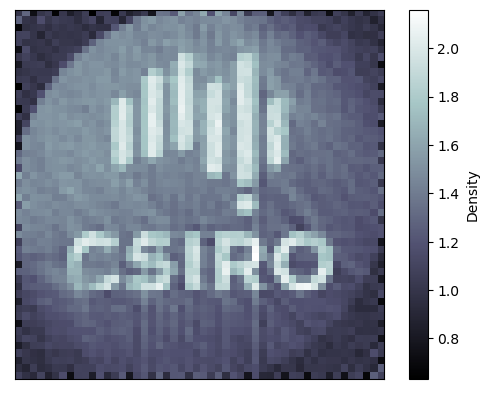

In [11]:
xrt.plot_model(inv_result.model);

## 5. Reflections / Conclusion / Further reading

We can see that...

---
## Watermark

<!-- Feel free to add more modules in the watermark_list below, if more packages are used -->
<!-- Otherwise please leave the below code cell unchanged -->

In [12]:
watermark_list = ["cofi", "numpy", "scipy", "matplotlib", "emcee", "arviz"]
for pkg in watermark_list:
    pkg_var = __import__(pkg)
    print(pkg, getattr(pkg_var, "__version__"))

cofi 0.1.2.dev9
numpy 1.21.6
scipy 1.9.1
matplotlib 3.5.3
emcee 3.1.2


arviz 0.12.1
